In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import json
import datetime
# Setting this option will print all collumns of a dataframe
pd.set_option('display.max_columns', None)
# Setting this option will print all of the data in a feature
pd.set_option('display.max_colwidth', None)

In this capstone, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because SpaceX can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against SpaceX for a rocket launch. In this lab, you will collect and make sure the data is in the correct format from an API. The following is an example of a successful and launch.

In [60]:
sapcex_url = 'https://api.spacexdata.com/v4/launches/past'

response = requests.get(sapcex_url).json()
data = pd.json_normalize(response)
data.head(1)

,static_fire_date_utc,static_fire_date_unix,net,window,rocket,success,failures,details,crew,ships,capsules,payloads,launchpad,flight_number,name,date_utc,date_unix,date_local,date_precision,upcoming,cores,auto_update,tbd,launch_library_id,id,fairings.reused,fairings.recovery_attempt,fairings.recovered,fairings.ships,links.patch.small,links.patch.large,links.reddit.campaign,links.reddit.launch,links.reddit.media,links.reddit.recovery,links.flickr.small,links.flickr.original,links.presskit,links.webcast,links.youtube_id,links.article,links.wikipedia,fairings
0,2006-03-17T00:00:00.000Z,1.142554e+09,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 33, 'altitude': None, 'reason': 'merlin engine failure'}]",Engine failure at 33 seconds and loss of vehicle,[],[],[],[5eb0e4b5b6c3bb0006eeb1e1],5e9e4502f5090995de566f86,1,FalconSat,2006-03-24T22:30:00.000Z,1143239400,2006-03-25T10:30:00+12:00,hour,False,"[{'core': '5e9e289df35918033d3b2623', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",True,False,None,5eb87cd9ffd86e000604b32a,False,False,False,[],https://images2.imgbox.com/94/f2/NN6Ph45r_o.png,https://images2.imgbox.com/5b/02/QcxHUb5V_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=0a_00nJ_Y88,0a_00nJ_Y88,https://www.space.com/2196-spacex-inaugural-falcon-1-rocket-lost-launch.html,https://en.wikipedia.org/wiki/DemoSat,NaN


In [61]:
data = data[['rocket', 'payloads', 'launchpad', 'cores', 'flight_number', 'date_utc']]
data.head()

,rocket,payloads,launchpad,cores,flight_number,date_utc
0,5e9d0d95eda69955f709d1eb,[5eb0e4b5b6c3bb0006eeb1e1],5e9e4502f5090995de566f86,"[{'core': '5e9e289df35918033d3b2623', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",1,2006-03-24T22:30:00.000Z
1,5e9d0d95eda69955f709d1eb,[5eb0e4b6b6c3bb0006eeb1e2],5e9e4502f5090995de566f86,"[{'core': '5e9e289ef35918416a3b2624', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",2,2007-03-21T01:10:00.000Z
2,5e9d0d95eda69955f709d1eb,"[5eb0e4b6b6c3bb0006eeb1e3, 5eb0e4b6b6c3bb0006eeb1e4]",5e9e4502f5090995de566f86,"[{'core': '5e9e289ef3591814873b2625', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",3,2008-08-03T03:34:00.000Z
3,5e9d0d95eda69955f709d1eb,[5eb0e4b7b6c3bb0006eeb1e5],5e9e4502f5090995de566f86,"[{'core': '5e9e289ef3591855dc3b2626', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",4,2008-09-28T23:15:00.000Z
4,5e9d0d95eda69955f709d1eb,[5eb0e4b7b6c3bb0006eeb1e6],5e9e4502f5090995de566f86,"[{'core': '5e9e289ef359184f103b2627', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",5,2009-07-13T03:35:00.000Z


In [62]:
# removendo colunas com multiplos valores para core e payloads
data = data[data['cores'].map(len)==1]
data = data[data['payloads'].map(len)==1]

#como core e payload estão como lista, deve-se extrair apenas o valor
data['cores'] = data['cores'].map(lambda x: x[0])
data['payloads'] = data['payloads'].map(lambda x: x[0])

#extraindo a data de date_utc
data['date'] = pd.to_datetime(data['date_utc']).dt.date

In [63]:
# restringindo as datas de lancamento
data = data.query('date <= datetime.date(2020,11,13)')

In [64]:
BoosterVersion = []
for x in data['rocket']:
    response = requests.get(f"https://api.spacexdata.com/v4/rockets/{str(x)}").json()
    BoosterVersion.append(response['name'])

In [65]:
pd.DataFrame(BoosterVersion).value_counts()

Falcon 9    90
Falcon 1     4
dtype: int64

In [66]:
LaunchSite = []
Longitude = []
Latitude = []

for x in data['launchpad']:
    if x:
        response = requests.get(f"https://api.spacexdata.com/v4/launchpads/{str(x)}").json()
        LaunchSite.append(response['name'])
        Longitude.append(response['longitude'])

        Latitude.append(response['latitude'])

In [67]:
PayloadMass = []
Orbit = []
for x in data['payloads']:
    if x:
        response = requests.get(f"https://api.spacexdata.com/v4/payloads/{str(x)}").json()
        PayloadMass.append(response['mass_kg'])
        Orbit.append(response['orbit'])

In [68]:
Block = []
ReusedCount = []
Serial = []
Outcome = []
Flights = []
GridFins = []
Reused = []
Legs = []
LandingPad = []

for core in data['cores']:
    if core['core'] != None:
        response = requests.get(f"https://api.spacexdata.com/v4/cores/{core['core']}").json()
        Block.append(response['block'])
        ReusedCount.append(response['reuse_count'])
        Serial.append(response['serial'])
    else:
        Block.append(None)
        ReusedCount.append(None)
        Serial.append(None)
        
    Outcome.append(str(core['landing_success'])+' '+str(core['landing_type']))
    Flights.append(core['flight'])
    GridFins.append(core['gridfins'])
    Reused.append(core['reused'])
    Legs.append(core['legs'])
    LandingPad.append(core['landpad'])

In [69]:
launch_dict = {
    'FlightNumber': list(data['flight_number']),
'Date': list(data['date']),
'BoosterVersion':BoosterVersion,
'PayloadMass':PayloadMass,
'Orbit':Orbit,
'LaunchSite':LaunchSite,
'Outcome':Outcome,
'Flights':Flights,
'GridFins':GridFins,
'Reused':Reused,
'Legs':Legs,
'LandingPad':LandingPad,
'Block':Block,
'ReusedCount':ReusedCount,
'Serial':Serial,
'Longitude': Longitude,
'Latitude': Latitude}

In [71]:
df = pd.DataFrame(launch_dict)
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2006-03-24,Falcon 1,20.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin1A,167.743129,9.047721
1,2,2007-03-21,Falcon 1,NaN,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin2A,167.743129,9.047721
2,4,2008-09-28,Falcon 1,165.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin2C,167.743129,9.047721
3,5,2009-07-13,Falcon 1,200.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin3C,167.743129,9.047721
4,6,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857


In [74]:
#apenas para o Falcon 9
df = df.query('BoosterVersion == "Falcon 9"')

In [83]:
df.isnull().sum()

FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass        0
Orbit              0
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Block              0
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
dtype: int64

In [82]:
#preenchendo os valores nulos com a media 
df['PayloadMass'] = df['PayloadMass'].fillna(df['PayloadMass'].mean())

In [84]:
df.to_csv('dataset_part1.csv', index=False)

# Parte 2: extraindo mais dados do Flacon 9 pela wikipedia

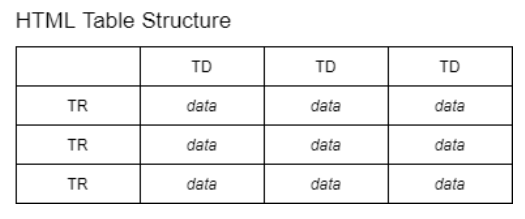

In [122]:
url = 'https://en.wikipedia.org/w/index.php?title=List_of_Falcon_9_and_Falcon_Heavy_launches&oldid=1027686922'

response = requests.get(url).text
soup = BeautifulSoup(response, 'html.parser')

In [123]:
soup.title

<title>List of Falcon 9 and Falcon Heavy launches - Wikipedia</title>

In [147]:
html_tables = soup.find_all('table')
len(html_tables)

24

In [167]:
first_launch_table = html_tables[2]
first_launch_table.tbody.find_all('th')

[<th scope="col">Flight No.
 </th>,
 <th scope="col">Date and<br/>time (<a href="/wiki/Coordinated_Universal_Time" title="Coordinated Universal Time">UTC</a>)
 </th>,
 <th scope="col"><a href="/wiki/List_of_Falcon_9_first-stage_boosters" title="List of Falcon 9 first-stage boosters">Version,<br/>Booster</a> <sup class="reference" id="cite_ref-booster_11-0"><a href="#cite_note-booster-11">[b]</a></sup>
 </th>,
 <th scope="col">Launch site
 </th>,
 <th scope="col">Payload<sup class="reference" id="cite_ref-Dragon_12-0"><a href="#cite_note-Dragon-12">[c]</a></sup>
 </th>,
 <th scope="col">Payload mass
 </th>,
 <th scope="col">Orbit
 </th>,
 <th scope="col">Customer
 </th>,
 <th scope="col">Launch<br/>outcome
 </th>,
 <th scope="col"><a href="/wiki/Falcon_9_first-stage_landing_tests" title="Falcon 9 first-stage landing tests">Booster<br/>landing</a>
 </th>,
 <th rowspan="2" scope="row" style="text-align:center;">1
 </th>,
 <th rowspan="2" scope="row" style="text-align:center;">2
 </th>,
 <

In [218]:
# colunas da tabela:
column_names = []

for row in first_launch_table.find_all('th'):
    column_name = ' '.join(row.contents).strip()
        
    if th != None and len(column_name) > 0:
        column_names.append(column_name)

column_names

['Flight No.',
 'Date and time ( )',
 'Launch site',
 'Payload',
 'Payload mass',
 'Orbit',
 'Customer',
 'Launch outcome',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7']

In [221]:
column_names = column_names[:8]
column_names

['Flight No.',
 'Date and time ( )',
 'Launch site',
 'Payload',
 'Payload mass',
 'Orbit',
 'Customer',
 'Launch outcome']

In [455]:
# criando dicionario com as colunas extraidas
launch_dict= dict.fromkeys(column_names)

del launch_dict['Date and time ( )']
launch_dict['Flight No.'] = []
launch_dict['Launch site'] = []
launch_dict['Payload'] = []
launch_dict['Payload mass'] = []
launch_dict['Orbit'] = []
launch_dict['Customer'] = []
launch_dict['Launch outcome'] = []
# Adicionando features para igualar aos dados coletados anteriormente
launch_dict['Version Booster']=[]
launch_dict['Booster landing']=[]
launch_dict['Date']=[]
launch_dict['Time']=[]

In [456]:
import unicodedata
extracted_row = 0
# preenchendo os valores dos dicionarios
for table_number, table in enumerate(soup.find_all('table',"wikitable plainrowheaders collapsible")):
    for rows in table.find_all("tr"):
        #verificar se a linha corresponde a um número de lançamento
        if rows.th:
            if rows.th.string:
                flight_number = rows.th.string.strip()
                #True caso positivo
                flag=flight_number.isdigit()
        else:
            #False caso negativo
            flag = False
                
        row = rows.find_all('td')
        if flag:
            #Caso positivo linha será extraida
            extracted_row +=1
            # numero do lançamento
            launch_dict['Flight No.'].append(flight_number)
            
            #data e horario
            date_time_list = [data_time for data_time in list(row[0].strings)][:2]
            date = date_time_list[0].strip(',')
            time = date_time_list[1].strip()
            launch_dict['Date'].append(date)
            launch_dict['Time'].append(time)
            
            #versão
            bv = ''.join([booster_version.strip() for i,booster_version in enumerate(row[1].strings) if i%2==0][0:-1])
            if not bv:
                bv = row[1].a.string
            launch_dict['Version Booster'].append(bv.strip())
            
            #launch site
            launch_site = row[2].a.string
            launch_dict['Launch site'].append(launch_site.strip())
            
            #payload
            payload = row[3].a.string
            launch_dict['Payload'].append(payload.strip())
            
            #payload mass
            mass=unicodedata.normalize("NFKD", row[4].text).strip()
            if mass:
                new_mass = mass.find("kg")
                new_mass=mass[0:mass.find("kg")+2]
            else:
                new_mass=0
            launch_dict['Payload mass'].append(new_mass)

            orbit = row[5].a.string
            launch_dict['Orbit'].append(orbit)            
            
            try:
                customer = row[6].a.string
                launch_dict['Customer'].append(customer.strip())
            except:
                customer = np.nan
                launch_dict['Customer'].append(customer)
            
            launch_outcome = list(row[7].strings)[0]
            launch_dict['Launch outcome'].append(launch_outcome.strip())
            
            booster_landing  = [i for i in row[8].strings][0]
            launch_dict['Booster landing'].append(booster_landing.strip())

In [457]:
launch_wiki = pd.DataFrame(launch_dict)
launch_wiki

,Flight No.,Launch site,Payload,Payload mass,Orbit,Customer,Launch outcome,Version Booster,Booster landing,Date,Time
0,1,CCAFS,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success,F9 v1.0B0003.1,Failure,4 June 2010,18:45
1,2,CCAFS,Dragon,0,LEO,NASA,Success,F9 v1.0B0004.1,Failure,8 December 2010,15:43
2,3,CCAFS,Dragon,525 kg,LEO,NASA,Success,F9 v1.0B0005.1,No attempt,22 May 2012,07:44
3,4,CCAFS,SpaceX CRS-1,"4,700 kg",LEO,NASA,Success,F9 v1.0B0006.1,No attempt,8 October 2012,00:35
4,5,CCAFS,SpaceX CRS-2,"4,877 kg",LEO,NASA,Success,F9 v1.0B0007.1,No attempt,1 March 2013,15:10
...,...,...,...,...,...,...,...,...,...,...,...
116,117,CCSFS,Starlink,"15,600 kg",LEO,SpaceX,Success,F9 B5B1051.10,Success,9 May 2021,06:42
117,118,KSC,Starlink,"~14,000 kg",LEO,SpaceX,Success,F9 B5B1058.8,Success,15 May 2021,22:56
118,119,CCSFS,Starlink,"15,600 kg",LEO,SpaceX,Success,F9 B5B1063.2,Success,26 May 2021,18:59
119,120,KSC,SpaceX CRS-22,"3,328 kg",LEO,NASA,Success,F9 B5B1067.1,Success,3 June 2021,17:29


In [458]:
launch_wiki.to_csv('spacex_web_scraped.csv', index=False)